##CO543:Image Processing
##K.G.I.S.Nawarathna
##E/17/219

Exercise 1

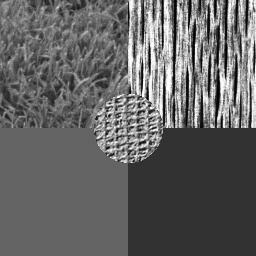

In [36]:
#importing libraries
from matplotlib import pyplot as plt
import numpy as np
import cv2

#importing the patch
from google.colab.patches import cv2_imshow

#load the library
img = cv2.imread('/content/texture.tif')

#display the image
cv2_imshow(img)

Exercise 2

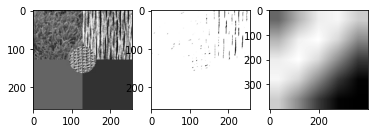

In [37]:
#defining parameters
ksize = 5 
sigma = 5 
theta = 1*np.pi/4 
lamda = 1*np.pi/4
gamma=0.9 
phi = 0.8

#creating the kernal
kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F) 

#creating the image using the kernal
fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
kernel_resized = cv2.resize(kernel, (400, 400)) 

#plotting images
plt.subplot(1,3,1), plt.imshow(img, cmap='gray')
plt.subplot(1,3,2), plt.imshow(fimg, cmap='gray')
plt.subplot(1,3,3), plt.imshow(kernel_resized, cmap='gray')

#drawing the images
plt.show()


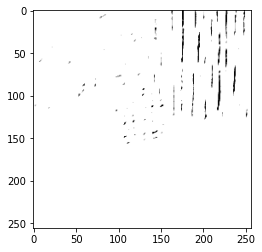

In [38]:
# creating a 2d array of floats from the image
pixel_vals = fimg.reshape((-1,1))
pixel_vals = np.float32(pixel_vals)

#setting the stop criteria as 100 iterations or 85% of the epsilon
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

#execute k means for number of clusters = 5
k = 5
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#convert the data into bytes
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

#creating the segmented image
segmented_image = segmented_data.reshape((fimg.shape))

#plot the image
plt.imshow(segmented_image)


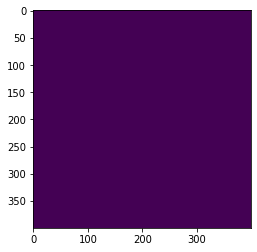

In [39]:
# creating a 2d array of floats from the image
pixel_vals = kernel_resized.reshape((-1,1))
pixel_vals = np.float32(pixel_vals)

#setting the stop criteria as 100 iterations or 85% of the epsilon
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

#execute k means for number of clusters = 5
k = 5
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#convert the data into bytes
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

#creating the segmented image
segmented_image = segmented_data.reshape((kernel_resized.shape))

#plot the image
plt.imshow(segmented_image)


Exercise 3

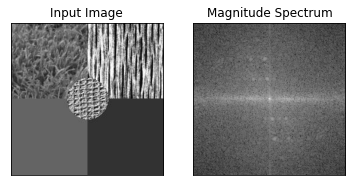

In [40]:
#loading the image
img = cv2.imread('/content/texture.tif',0)

#turn the image into floats
img_float32 = np.float32(img)

#get the dft of the image
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

#apply shifting
dft_shift = np.fft.fftshift(dft)

#get the magnitude spectrum
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

#plot the images
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

#display images
plt.show()

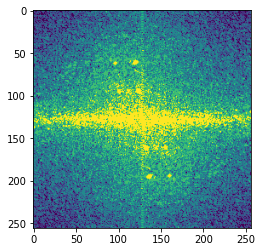

In [41]:
#geeting the matrix of the rgb representation of the image in floats
pixel_vals = magnitude_spectrum.reshape((-1,1))
pixel_vals = np.float32(pixel_vals)

#setting the stop criteria as 100 iterations or 85% of the epsilon
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

#execute k means for number of clusters = 5 and centroids are initialized randomly
k = 5
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#convert the data into bytes
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

#creating the segmented image
segmented_image = segmented_data.reshape((magnitude_spectrum.shape))

#plot the image
plt.imshow(segmented_image)


Exercise 4

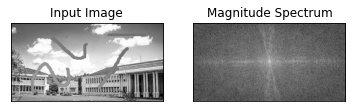

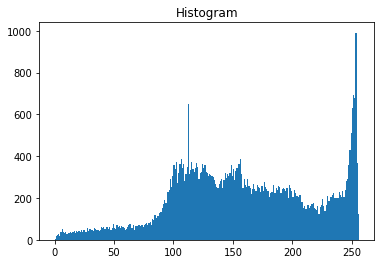

In [42]:
#importing the library with aliasing
import cv2 as cv

#load the image of the efac
img = cv.imread('/content/Efac.jpg',0)

#get the magnitude spectrum of the image
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f) 
magnitude_spectrum =20*np.log(np.abs(fshift))

#plotting the image
plt.subplot(121), plt.imshow(img,cmap = 'gray') 
plt.title('Input Image'), plt.xticks([]),
plt.yticks([]) 

#plotting the magnitude specturm of the image
plt.subplot(122),plt.imshow(magnitude_spectrum,cmap = 'gray') 
plt.title('Magnitude Spectrum'),
plt.xticks([]), 
plt.yticks([]) 
plt.show()

#plotting the histogram of the image
plt.hist(img.ravel(),256,[0,256])
plt.title('Histogram') 
plt.show()

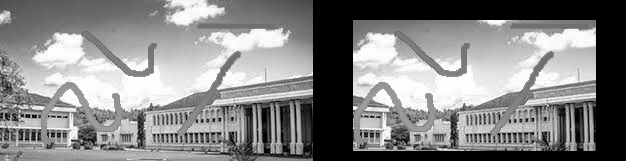

In [43]:
#creating the mask as zeros initially
mask = np.zeros((img.shape[0],img.shape[1]), np.uint8)

#setting the mask to 255 to a certain region
mask[20:-10, 40:-30] = 255

#applying the mask elementwise
masked_img = cv.bitwise_and(img,img,mask = mask)

#saving the image
cv.imwrite('masked1.jpg',masked_img)

#plotting the image and the masked image
set_of_images = np.hstack((img, masked_img))
cv2_imshow(set_of_images)

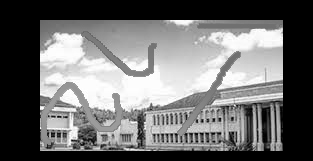

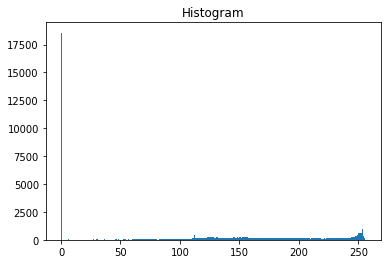

In [44]:
#applying the median blur to the image
img2 = cv.medianBlur(masked_img, 15)

#display the image
cv2_imshow(masked_img)

#plot the histogram of the image
plt.hist(masked_img.ravel(),256,[0,256])

#set the title
plt.title('Histogram') 

#show the histogram
plt.show()

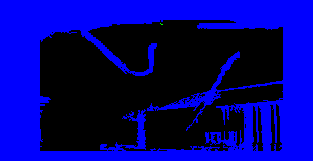

In [45]:
 #setting white and blacks to the background and foreground
_ , thresholded = cv.threshold(masked_img, 130, 255, cv.THRESH_BINARY_INV)

#get the amount and labels, here label 0 is the background
amount, labels = cv.connectedComponents(thresholded)

#preview for observation
preview = np.zeros((masked_img.shape[0], masked_img.shape[1], 3), dtype=np.uint8)

#draw blue and green labels
preview[labels == 1] = (255, 0, 0)
preview[labels == 2] = (0, 255, 0)

#displaying the image
cv2_imshow(preview)

In [46]:
#setting the white labels for drawing
preview[labels == 1] = (255, 255, 255)
preview[labels == 2] = (0, 255, 0)

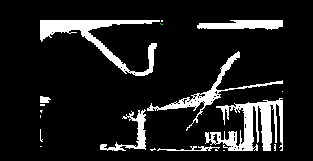

In [47]:
#creating a new mask, initialize with zeros
mask2 = np.zeros((preview.shape[0],preview.shape[1]), np.uint8)

#set some regions to 255
mask2[20:-10, 40:-30] = 255

#created the masked image using the bitwise anding
masked_img2 = cv.bitwise_and(preview,preview,mask = mask2)

#plot the image
cv2_imshow(masked_img2)

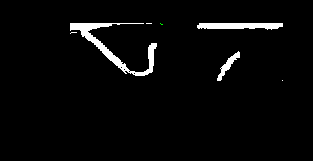

In [48]:
#create another mask
mask3 = np.zeros((preview.shape[0],preview.shape[1]), np.uint8)

#set the corresponding region to 255
mask3[23:-80, 70:-30] = 255

#creating the masked image
masked_img3 = cv.bitwise_and(masked_img2,masked_img2,mask = mask3)

#plot the image
cv2_imshow(masked_img3)

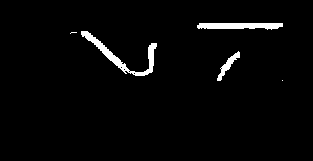

True

In [49]:
#creating another mask
mask4 = np.zeros((preview.shape[0],preview.shape[1]), np.uint8)

#set corresponding region to 255
mask4[:, :] = 255
mask4[23:-130, 70:-120] = 0

#creating the masked image
masked_img4 = cv.bitwise_and(masked_img3,masked_img3,mask = mask4)

#preview the image and save it
cv2_imshow(masked_img4)
cv.imwrite('upper_mask.jpg',masked_img4)

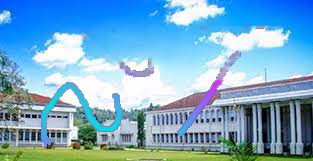

True

In [50]:
import numpy as np
import cv2

#load the image and the masked imaged
img = cv2.imread('/content/Efac.jpg')
mask = cv2.imread('/content/upper_mask.jpg', 0)

#making it inpaint
dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)

#preview the dst and save it
cv2_imshow(dst)
cv2.imwrite('efac_inpainted.png', dst)


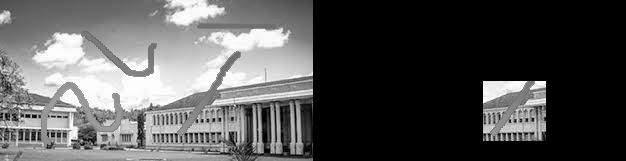

In [51]:
#load the image
img = cv.imread('/content/Efac.jpg',0)

#masking the curve
mask_lower = np.zeros((img.shape[0],img.shape[1]), np.uint8)
mask_lower[-80:-20, 170:-80] = 255
masked_img_lower = cv.bitwise_and(img,img,mask = mask_lower)

#plotting the images
set_of_images = np.hstack((img, masked_img_lower))
cv2_imshow(set_of_images)

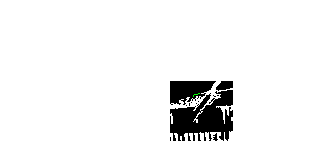

In [52]:
 #setting white and blacks to the background and foreground
_ , thresholded = cv.threshold(masked_img_lower, 125, 255, cv.THRESH_BINARY_INV)

#get the amount and labels, here label 0 is the background
amount, labels = cv.connectedComponents(thresholded)

#preview for observation
preview2 = np.zeros((masked_img_lower.shape[0], masked_img_lower.shape[1], 3), dtype=np.uint8)

#making the background white
preview2[labels == 1] = (255, 255, 255)
preview2[labels == 2] = (0, 255, 0)

#display the image
cv2_imshow(preview2)

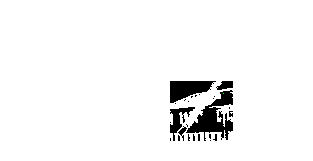

In [53]:
 #setting white and blacks to the background and foreground
_ , thresholded = cv.threshold(masked_img_lower, 145, 255, cv.THRESH_BINARY_INV)

#get the amount and labels, here label 0 is the background
amount, labels = cv.connectedComponents(thresholded)

#preview for observation
preview3 = np.zeros((masked_img_lower.shape[0], masked_img_lower.shape[1], 3), dtype=np.uint8)

# draw label 1 blue and label 2 green
preview3[labels == 1] = (255, 255, 255)
preview3[labels == 2] = (0, 255, 0)

#preview the image
cv2_imshow(preview3)

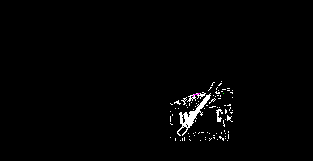

In [54]:
#create the mask using above 2 images
masked_img_lower_right = (cv.bitwise_and(~preview2,preview3))

#display it
cv2_imshow(masked_img_lower_right)

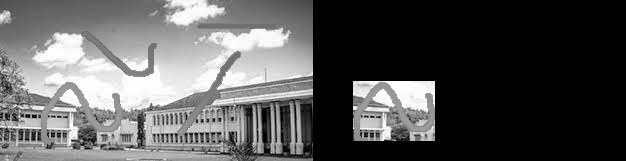

In [55]:
#load the image
img = cv.imread('/content/Efac.jpg',0)

#masking
mask_lower1 = np.zeros((img.shape[0],img.shape[1]), np.uint8)
mask_lower1[-80:-20, 40:122] = 255
masked_img_lower_left = cv.bitwise_and(img ,img ,mask = mask_lower1)

#display the image and the  masked image
set_of_images = np.hstack((img, masked_img_lower_left))
cv2_imshow(set_of_images)

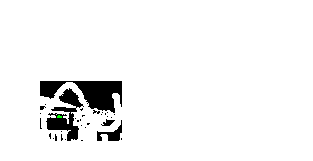

In [56]:
#setting white and blacks to the background and foreground
_ , thresholded = cv.threshold(masked_img_lower_left, 160, 255, cv.THRESH_BINARY_INV)

#get the amount and labels, here label 0 is the background
amount, labels = cv.connectedComponents(thresholded)

#preview for observation
preview4 = np.zeros((masked_img_lower_left.shape[0], masked_img_lower_left.shape[1], 3), dtype=np.uint8)

#setting label parameteres
preview4[labels == 1] = (255, 255, 255)
preview4[labels == 2] = (0, 255, 0)

#display the image
cv2_imshow(preview4)

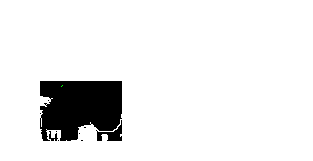

In [57]:
#setting white and blacks to the background and foreground
_ , thresholded = cv.threshold(masked_img_lower_left, 140, 255, cv.THRESH_BINARY_INV)

#get the amount and labels, here label 0 is the background
amount, labels = cv.connectedComponents(thresholded)

#preview for observation
preview5 = np.zeros((masked_img_lower_left.shape[0], masked_img_lower_left.shape[1], 3), dtype=np.uint8)

#setting the labels
preview5[labels == 1] = (255, 255, 255)
preview5[labels == 2] = (0, 255, 0)

#display the image
cv2_imshow(preview5)

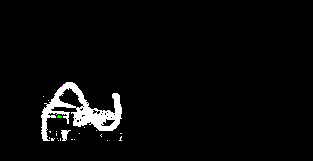

In [58]:
#masking the lower left and display it
masked_img_lower_left = (cv.bitwise_and(~preview5,preview4))
cv2_imshow(masked_img_lower_left)

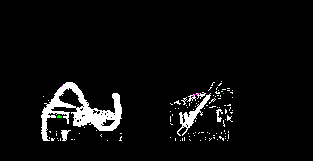

In [59]:
#masking the lower part of the image and dispaly it
masked_img_low = cv.bitwise_or(masked_img_lower_right,masked_img_lower_left)
cv2_imshow(masked_img_low)

In [60]:
#save the image
cv.imwrite('lower_mask.jpg',masked_img_low)

True

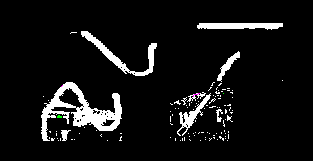

In [61]:
#apply bitwise or and display it
masked_img_ = cv.bitwise_or(masked_img_low,masked_img4)
cv2_imshow(masked_img_)

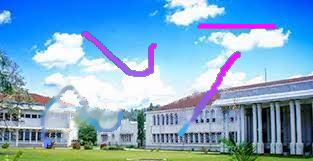

True

In [62]:
import numpy as np
import cv2

#load the image and the masked imaged
img = cv2.imread('/content/Efac.jpg')
mask = cv2.imread('/content/lower_mask.jpg', 0)

#making it inpaint
dst = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)

#preview the dst and save it
cv2_imshow(dst)
cv2.imwrite('efac_inpainted.png', dst)
